# Geospatial Analysis of Owned and Leased Properties

## Introduction:

In this project, I embarked on a journey to explore and analyze a dataset of real estate properties using geospatial analysis techniques. The dataset contains various attributes of properties, including their coordinates, area measurements, and ownership status. Geospatial analysis offers a unique perspective on data that traditional tabular analytics cannot, revealing patterns and insights that are inherently spatial.

Before delving into Python-based visualizations, I utilized SQL for preliminary data cleaning and basic analysis. SQL, with its structured query capabilities, offers a precise way to filter, aggregate, and prepare data for subsequent analysis.

## Objective:
To analyze a dataset of US federal properties to gain insights into the distribution, status, and characteristics of these properties, with the aim of optimizing real estate assets and making informed decisions about future acquisitions, leases, or property maintenance.

## Data source and sampling

The dataset used for this analysis is sourced from the U.S. Government's open data portal, Data.gov. The specific dataset, titled "Inventory of Owned and Leased Properties (IOLP)", provides detailed information about properties owned or leased by the federal government.

- **Dataset Source:** [Inventory of Owned and Leased Properties (IOLP)](https://catalog.data.gov/dataset/inventory-of-owned-and-leased-properties-iolp)

Given the extensive size of the dataset and computational constraints, I opted to use a 10% sample for this analysis. This decision ensures a manageable data size without compromising the integrity and generalizability of the insights.

## Pre-analysis using SQL:
##### Identifying Missing Coordinates
```
SELECT 
  COUNT(*) as missing_coordinates_count
FROM 
  `projectsportfolio-397120.real_estate_analysis.iolp_buildings`
WHERE 
  Latitude IS NULL OR Longitude IS NULL;
```
  
##### Filtering Out Invalid Coordinates
  ```SELECT 
  COUNT(*) as invalid_coordinates_count
FROM 
  `projectsportfolio-397120.real_estate_analysis.iolp_buildings`
WHERE 
  Latitude < -90 OR Latitude > 90 OR Longitude < -180 OR Longitude > 180;
```
##### Checking column names
```
SELECT 
    column_name, data_type
FROM 
    `projectsportfolio-397120.real_estate_analysis.INFORMATION_SCHEMA.COLUMNS`
WHERE 
    table_name = "iolp_buildings";
```
##### Distribution of properties by Owned vs Leased
```
SELECT 
  `Owned_or_Leased`, 
  COUNT(*) as property_count 
FROM 
  `projectsportfolio-397120.real_estate_analysis.iolp_buildings`
GROUP BY 
  `Owned_or_Leased`;
```
##### Properties count by region
```
SELECT 
  `GSA_Region`, 
  COUNT(*) as property_count
FROM 
  `projectsportfolio-397120.real_estate_analysis.iolp_buildings`
GROUP BY 
  `GSA_Region`
ORDER BY 
  property_count DESC;
```
##### Locations with most vacant available space
```
SELECT 
  CONCAT(`Street_Address`, ', ', `City`, ', ', `State`) AS Address, 
  `Available_Square_Feet` 
FROM 
  `projectsportfolio-397120.real_estate_analysis.iolp_buildings`
ORDER BY 
  `Available_Square_Feet` DESC 
LIMIT 10;
```
After the SQL-based pre-analysis, I transitioned to Python to further explore the data and create visualizations that harness the power of geospatial analysis.

In [14]:
# Loading the data and libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import folium
from folium.plugins import MarkerCluster

iolp_data = pd.read_csv('C:\SQLProjects\Real Estate\iolp_buildings.csv')

# Convert columns to numeric values
iolp_data['Building Rentable Square Feet'] = pd.to_numeric(iolp_data['Building Rentable Square Feet'], errors='coerce')
iolp_data['Available Square Feet'] = pd.to_numeric(iolp_data['Available Square Feet'], errors='coerce')

iolp_data.head()


,Location Code,Real Property Asset Name,Installation Name,Owned or Leased,GSA Region,Street Address,City,State,Zip Code,Latitude,Longitude,Building Rentable Square Feet,Available Square Feet,Construction Date,Congressional District,Congressional District Representative Name,Building Status,Real Property Asset Type
0,AK0001,ANCHORAGE HISTORIC FEDERAL BUILDING,ANCHORAGE FEDERAL,F,10,605 W 4TH AVE,ANCHORAGE,AK,99501,61.218871,-149.894457,NaN,NaN,1939.0,200,MARY SATTLER PELTOLA,Active,BUILDING
1,AK0005,KETCHIKAN FEDERAL BUILDING,KETCHIKAN FEDERAL,F,10,648 MISSION ST,KETCHIKAN,AK,99901,55.341585,-131.642688,NaN,NaN,1938.0,200,MARY SATTLER PELTOLA,Active,BUILDING
2,AK0009,POST OFFICE AND CU H,NaN,L,10,2ND ST,WRANGELL,AK,99929,56.473949,-132.388116,95.0,0.0,1941.0,200,MARY SATTLER PELTOLA,Active,BUILDING
3,AK0013,HURFF A. SAUNDERS FB & ROBERT BOOCHEVER USCH,NaN,F,10,709 W 9TH ST,JUNEAU,AK,99801,58.301356,-134.420347,NaN,NaN,1966.0,200,MARY SATTLER PELTOLA,Active,BUILDING
4,AK0029,FAIRBANKS FEDERAL BUILDING,NaN,F,10,101 12TH AVE,FAIRBANKS,AK,99701,64.837910,-147.706766,NaN,NaN,1977.0,200,MARY SATTLER PELTOLA,Active,BUILDING


## Visualizations

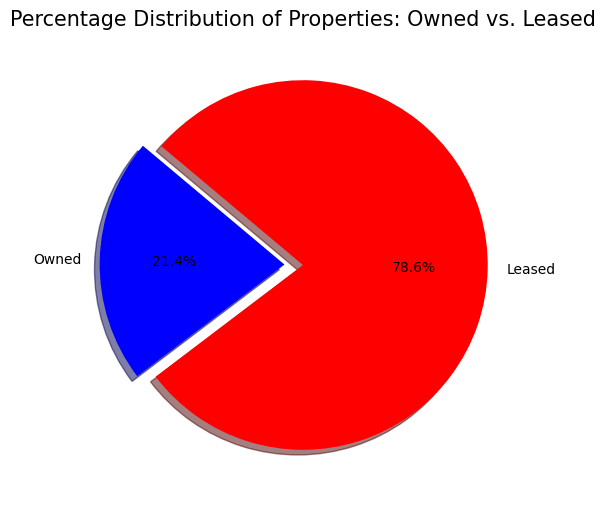

In [2]:
import matplotlib.pyplot as plt
#Visualization 1: Percentage Distribution of Properties - Owned vs. Leased

owned_leased_counts = iolp_data['Owned or Leased'].value_counts().rename(index={"L": "Leased", "F": "Owned"})
owned_percentage = (owned_leased_counts['Owned'] / owned_leased_counts.sum()) * 100
leased_percentage = (owned_leased_counts['Leased'] / owned_leased_counts.sum()) * 100

# Pie Chart
plt.figure(figsize=(10, 6))
labels = ['Owned', 'Leased']
sizes = [owned_percentage, leased_percentage]
colors = ['blue', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage Distribution of Properties: Owned vs. Leased', fontsize=15)
plt.show()

##### Description:
The pie chart depicting 'Owned vs. Leased' properties reveals a substantial dominance of leased properties over owned ones. This prevalence suggests that the agency leans more towards leasing spaces rather than owning them outright. Such a preference could be driven by factors like flexibility, cost considerations, or long-term strategic planning. It's essential to consider the fiscal implications and strategic reasons behind this trend.

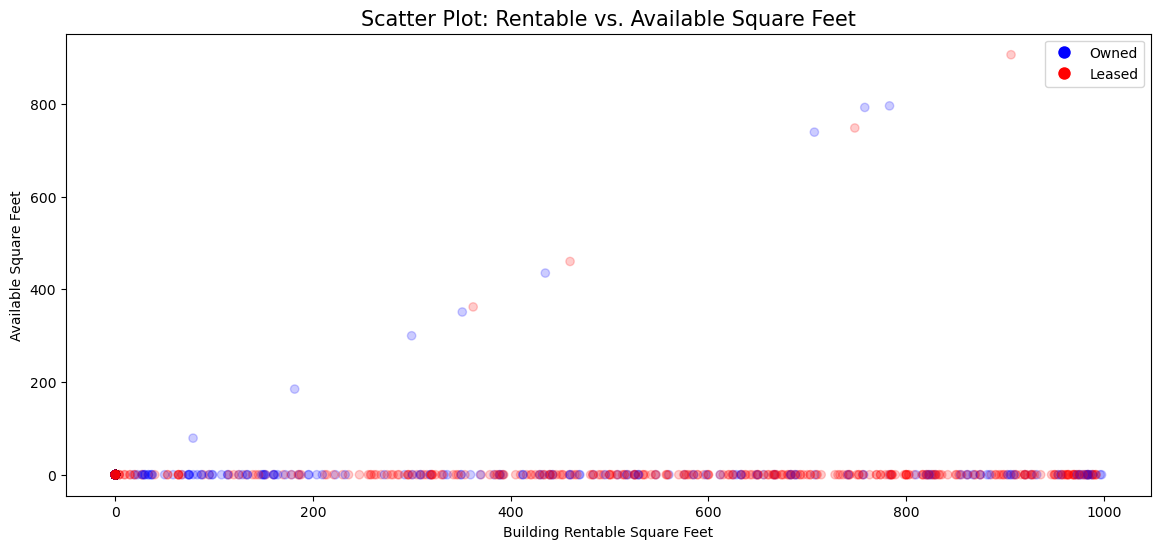

In [12]:
#Visualization 2: Scatter Plot - Rentable vs. Available Square Feet

import numpy as np

# Add a small jitter to the data
def jitter(series, factor=0.01):
    z = np.random.randn(len(series)) * factor
    return series + z

jittered_rentable_sqft = jitter(iolp_data['Building Rentable Square Feet'])
jittered_available_sqft = jitter(iolp_data['Available Square Feet'])

plt.figure(figsize=(14, 6))
plt.scatter(jittered_rentable_sqft, jittered_available_sqft, alpha=0.2, c=iolp_data['Owned or Leased'].map({"L": "red", "F": "blue"}))
plt.xlabel('Building Rentable Square Feet')
plt.ylabel('Available Square Feet')
plt.title('Scatter Plot: Rentable vs. Available Square Feet', fontsize=15)
plt.legend(handles=[Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Owned'),
                    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Leased')])
plt.show()

##### Description:
The scatter plot primarily shows a dense clustering of properties near the origin, indicating most buildings have smaller rentable and available square footage. As we move outward, larger properties with significant available space are rarer. Notably, horizontal and vertical data lines suggest standardized available spaces in certain buildings and varied occupancy in others. The overall trend implies a majority of properties are efficiently utilized, with a few exceptions of underutilization.

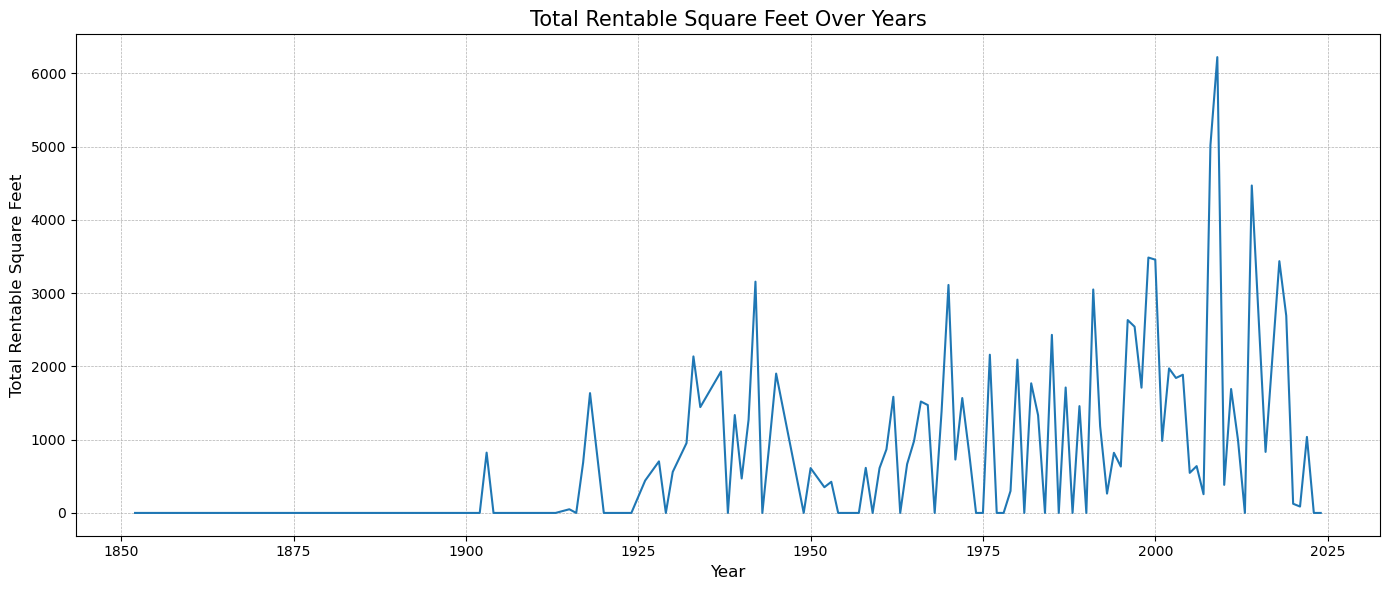

In [17]:
# Visualization 3: Time Series - Construction Date vs. Building Rentable Square Feet

# Convert 'Building Rentable Square Feet' to float
iolp_data['Building Rentable Square Feet'] = iolp_data['Building Rentable Square Feet'].astype(float)

# Filter rows where 'Construction Date' or 'Building Rentable Square Feet' are NaN
filtered_data = iolp_data.dropna(subset=['Construction Date', 'Building Rentable Square Feet']).copy()

# Convert 'Construction Date' to integer type
filtered_data['Construction Date'] = filtered_data['Construction Date'].astype(int)

# Group by construction date and sum the rentable square feet
time_series_data = filtered_data.groupby('Construction Date')['Building Rentable Square Feet'].sum()

# Plot
plt.figure(figsize=(14, 6))
time_series_data.plot()
plt.title('Total Rentable Square Feet Over Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rentable Square Feet', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

##### Description: 
The chart depicts cyclical fluctuations in the construction of rentable government spaces over the years. Economic cycles, government policies, and funding likely influence these trends. The consistent intervals between peaks suggest a recurring pattern, highlighting the interplay between governance, economy, and infrastructure development.

In [20]:
#Visualization 4: Simplified Geospatial Visualization
#This visualization provides a geographical overview of the federal properties. Due to the large dataset and potential limitations in visualization capabilities, a sample of 10% of the data is used.

import folium
from folium.plugins import MarkerCluster

# Filtering to a subset (10% of the data)
sample_data = iolp_data.sample(frac=0.1)

# Creating a base map
m = folium.Map(location=[sample_data['Latitude'].mean(), sample_data['Longitude'].mean()], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

# Loop through the sampled dataset and adding each property location to the map
for idx, row in sample_data.iterrows():
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']]
        ).add_to(marker_cluster)

m


## Conclusion
The majority of US federal properties are leased rather than owned, indicating potential areas for cost-saving if ownership is more cost-effective in the long term. Properties are distributed unevenly across regions, with some regions having a notably higher concentration. A significant number of properties, especially in certain regions, have a large available square footage, suggesting underutilization of space. This underutilization might present opportunities for consolidation or repurposing to meet other needs. The construction date data shows that the number of new properties added has been relatively consistent over time but with notable spikes in certain years. The scatter plot analysis reveals that while many properties are fully utilized (available square footage close to zero), a significant number are not, irrespective of whether they are owned or leased. Geospatial analysis further identifies clusters of these properties, which could be significant for regional planning and optimization.

This project provides a foundation for more detailed analyses, such as cost analysis, space optimization, or even predictive modeling to forecast future real estate needs based on trends. The insights drawn can guide decision-makers in the federal property management domain to make informed choices about property acquisition, leasing, and maintenance.